In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
with open('output.npy', 'rb') as f:
    raw_np_data = np.load(f)

print(raw_np_data.shape)

(40, 84, 71)


In [3]:
from tsai.all import *
my_setup()

os              : Windows-10-10.0.22621-SP0
python          : 3.11.7
tsai            : 0.3.8
fastai          : 2.7.13
fastcore        : 1.5.29
torch           : 2.1.1+cpu
device          : cpu
cpu cores       : 10
threads per cpu : 1
RAM             : 15.73 GB
GPU memory      : N/A


In [10]:
dataset_name = "FirstWordExpDataset"

# Labels retrieved from image in preprocessing file. Find a better way to do this.
y = [3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2]
X = raw_np_data.copy()

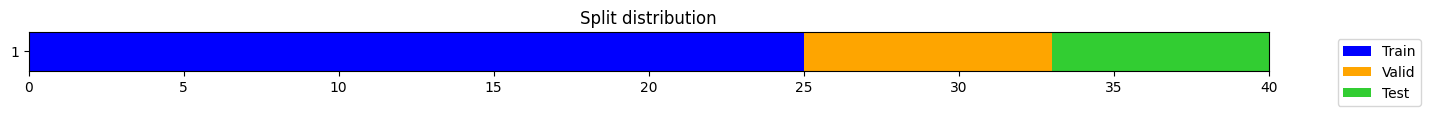

In [11]:
train_test_splits = get_walk_forward_splits(X, n_splits=1, anchored=True, test_size=0.175, valid_size=0.2, show_plot=True, test_after_valid=True)

In [17]:
print(len(y))

X_train, X_valid, X_test= train_test_splits[0]
print(X_train, X_valid, X_test)

y_train, y_valid, y_test = y[:len(X_train) - 1], y[len(X_train) - 1:len(X_train)+len(X_valid) - 1], y[len(X_train)+len(X_valid) - 1:]
print(y_train, y_valid, y_test)
print(len(y_train), len(y_valid), len(y_test))

40
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] [25, 26, 27, 28, 29, 30, 31, 32] [33, 34, 35, 36, 37, 38, 39]
[3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2] [3, 5, 6, 8, 1, 4, 7, 2] [3, 5, 6, 8, 1, 4, 7, 2]
24 8 8


In [28]:
train_set = TSDataset(np.array(X_train), np.array(y_train).astype(int) - 1, types=(TSTensor, TSLabelTensor))
train_dl = TSDataLoader(train_set, batch_size=4, num_workers=0)
valid_set = TSDataset(np.array(X_valid), np.array(y_valid).astype(int) - 1, types=(TSTensor, TSLabelTensor))
valid_dl = TSDataLoader(valid_set, batch_size=4, num_workers=0)
test_set = TSDataset(np.array(X_test), np.array(y_test).astype(int) - 1, types=(TSTensor, TSLabelTensor))
test_dl = TSDataLoader(test_set, batch_size=4, num_workers=0)

dls = TSDataLoaders(train_dl, valid_dl, test_dl, device=default_device())

c = len(np.unique(y_train))
print(c)

#TSClassifier(X=X, y=y, splits=train_test_splits, arch='InceptionTimePlus', metrics=accuracy)

#dsets = TSDataset(X, y)
#dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], num_workers=0)

8


In [34]:
model = InceptionTimePlus(c_in=8, c_out=8, vars=dls.vars, len=dls.len, features=dls.features, device=dls.device)

IndexError: tuple index out of range